In [1]:
import csv
import time
import requests
import datetime
import pandas as pd
from bs4 import BeautifulSoup

In [84]:
url = "https://footballdatabase.com/clubs-ranking/kawasaki-frontale"

In [85]:
r = requests.get(url)

In [86]:
r

<Response [200]>

In [87]:
soup = BeautifulSoup(r.text, 'html.parser')

In [88]:
records = soup.find_all("script")

In [89]:
len(records)

17

In [90]:
records[1]

<script type="text/javascript">window.onresize=function(){startDrawingChart()};window.onload=function(){startDrawingChart()};var data_array=[['Month','Points','Rank'],['January 2010',1416,551],['February 2010',1408,576],['March 2010',1396,646],['April 2010',1411,569],['May 2010',1409,569],['June 2010',1409,572],['July 2010',1407,587],['August 2010',1417,554],['September 2010',1411,568],['October 2010',1420,552],['November 2010',1418,560],['December 2010',1418,558],['January 2011',1418,558],['February 2011',1418,557],['March 2011',1422,540],['April 2011',1411,573],['May 2011',1421,549],['June 2011',1443,472],['July 2011',1425,539],['August 2011',1401,618],['September 2011',1392,682],['October 2011',1392,678],['November 2011',1399,656],['December 2011',1394,680],['January 2012',1394,682],['February 2012',1394,672],['March 2012',1401,631],['April 2012',1386,715],['May 2012',1401,635],['June 2012',1398,657],['July 2012',1400,653],['August 2012',1391,688],['September 2012',1395,667],['Octob

In [91]:
import re

m = re.search('^.*var data_array=([^;]*).*$', records[1].contents[0])

In [100]:
type(m)

re.Match

In [94]:
m.group(1)

"[['Month','Points','Rank'],['January 2010',1416,551],['February 2010',1408,576],['March 2010',1396,646],['April 2010',1411,569],['May 2010',1409,569],['June 2010',1409,572],['July 2010',1407,587],['August 2010',1417,554],['September 2010',1411,568],['October 2010',1420,552],['November 2010',1418,560],['December 2010',1418,558],['January 2011',1418,558],['February 2011',1418,557],['March 2011',1422,540],['April 2011',1411,573],['May 2011',1421,549],['June 2011',1443,472],['July 2011',1425,539],['August 2011',1401,618],['September 2011',1392,682],['October 2011',1392,678],['November 2011',1399,656],['December 2011',1394,680],['January 2012',1394,682],['February 2012',1394,672],['March 2012',1401,631],['April 2012',1386,715],['May 2012',1401,635],['June 2012',1398,657],['July 2012',1400,653],['August 2012',1391,688],['September 2012',1395,667],['October 2012',1388,705],['November 2012',1403,617],['December 2012',1404,613],['January 2013',1404,616],['February 2013',1404,609],['March 2013'

In [95]:
from ast import literal_eval

data = literal_eval(m.group(1))

In [96]:
del data[-1]
data

[['Month', 'Points', 'Rank'],
 ['January 2010', 1416, 551],
 ['February 2010', 1408, 576],
 ['March 2010', 1396, 646],
 ['April 2010', 1411, 569],
 ['May 2010', 1409, 569],
 ['June 2010', 1409, 572],
 ['July 2010', 1407, 587],
 ['August 2010', 1417, 554],
 ['September 2010', 1411, 568],
 ['October 2010', 1420, 552],
 ['November 2010', 1418, 560],
 ['December 2010', 1418, 558],
 ['January 2011', 1418, 558],
 ['February 2011', 1418, 557],
 ['March 2011', 1422, 540],
 ['April 2011', 1411, 573],
 ['May 2011', 1421, 549],
 ['June 2011', 1443, 472],
 ['July 2011', 1425, 539],
 ['August 2011', 1401, 618],
 ['September 2011', 1392, 682],
 ['October 2011', 1392, 678],
 ['November 2011', 1399, 656],
 ['December 2011', 1394, 680],
 ['January 2012', 1394, 682],
 ['February 2012', 1394, 672],
 ['March 2012', 1401, 631],
 ['April 2012', 1386, 715],
 ['May 2012', 1401, 635],
 ['June 2012', 1398, 657],
 ['July 2012', 1400, 653],
 ['August 2012', 1391, 688],
 ['September 2012', 1395, 667],
 ['October 2

In [97]:
type(data)

list

In [98]:
from datetime import datetime
for i in data[1:]:
    i[0] = datetime.strptime(i[0], '%B %Y')

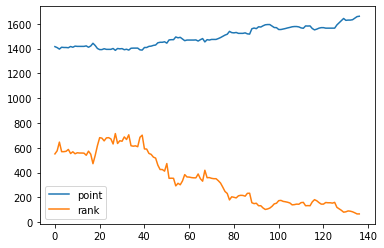

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

xs = [d[1] for d in data[1:]]
ys = [d[2] for d in data[1:]] 
plt.plot(xs, label='point')
plt.plot(ys, label='rank')
plt.legend()

In [81]:
data

[['Month', 'Points', 'Rank'],
 [datetime.datetime(2010, 1, 1, 0, 0), 1416, 551],
 [datetime.datetime(2010, 2, 1, 0, 0), 1408, 576],
 [datetime.datetime(2010, 3, 1, 0, 0), 1396, 646],
 [datetime.datetime(2010, 4, 1, 0, 0), 1411, 569],
 [datetime.datetime(2010, 5, 1, 0, 0), 1409, 569],
 [datetime.datetime(2010, 6, 1, 0, 0), 1409, 572],
 [datetime.datetime(2010, 7, 1, 0, 0), 1407, 587],
 [datetime.datetime(2010, 8, 1, 0, 0), 1417, 554],
 [datetime.datetime(2010, 9, 1, 0, 0), 1411, 568],
 [datetime.datetime(2010, 10, 1, 0, 0), 1420, 552],
 [datetime.datetime(2010, 11, 1, 0, 0), 1418, 560],
 [datetime.datetime(2010, 12, 1, 0, 0), 1418, 558],
 [datetime.datetime(2011, 1, 1, 0, 0), 1418, 558],
 [datetime.datetime(2011, 2, 1, 0, 0), 1418, 557],
 [datetime.datetime(2011, 3, 1, 0, 0), 1422, 540],
 [datetime.datetime(2011, 4, 1, 0, 0), 1411, 573],
 [datetime.datetime(2011, 5, 1, 0, 0), 1421, 549],
 [datetime.datetime(2011, 6, 1, 0, 0), 1443, 472],
 [datetime.datetime(2011, 7, 1, 0, 0), 1425, 539]

In [26]:
 df = pd.read_csv(f"./elo_rating_data/kawasaki-frontale.csv")

In [28]:
df

,Month,Points,Rank
0,January 2010,1416,551
1,February 2010,1408,576
2,March 2010,1396,646
3,April 2010,1411,569
4,May 2010,1409,569
...,...,...,...
133,February 2021,1633,84
134,March 2021,1646,76
135,April 2021,1658,67
136,May 2021,1661,67


In [29]:
df = df.drop(df.index[-1])
df

,Month,Points,Rank
0,January 2010,1416,551
1,February 2010,1408,576
2,March 2010,1396,646
3,April 2010,1411,569
4,May 2010,1409,569
...,...,...,...
132,January 2021,1630,89
133,February 2021,1633,84
134,March 2021,1646,76
135,April 2021,1658,67


In [30]:
for index,row in  df.iterrows():
    df.at[index,"Month"] = datetime.datetime.strptime(row["Month"],'%B %Y')
    

In [31]:
df

,Month,Points,Rank
0,2010-01-01 00:00:00,1416,551
1,2010-02-01 00:00:00,1408,576
2,2010-03-01 00:00:00,1396,646
3,2010-04-01 00:00:00,1411,569
4,2010-05-01 00:00:00,1409,569
...,...,...,...
132,2021-01-01 00:00:00,1630,89
133,2021-02-01 00:00:00,1633,84
134,2021-03-01 00:00:00,1646,76
135,2021-04-01 00:00:00,1658,67
